# Lab 2 - Classification

## Plot data points

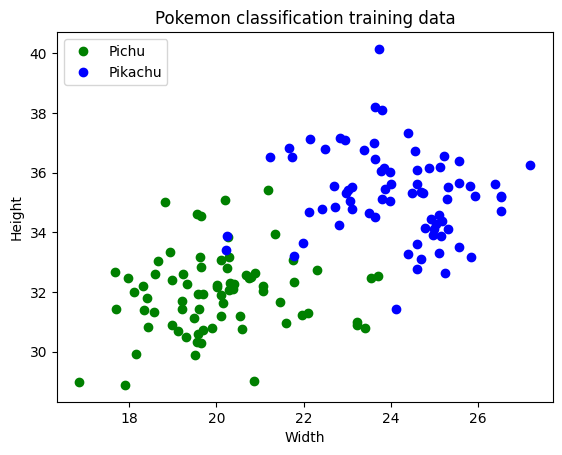

In [568]:
import numpy as np
import matplotlib.pyplot as plt

with open("../Data/lab2/datapoints.txt", 'r') as f_train:

    lines = f_train.readlines() # split training data into list of lines
    pichu_width, pichu_height, pikachu_width, pikachu_height = [], [], [], []

    # loop through training data lines
    # lines[0]: (width (cm), height (cm), label (0-pichu, 1-pikachu))
    for line in lines[1:]:

        # strip trailing \n and split comma-separated values into a list
        line = line.strip().split(", ")

        # sort data into width and height for each class
        if int(line[2]) == 0:
            pichu_width.append(float(line[0]))
            pichu_height.append(float(line[1]))
        else:
            pikachu_width.append(float(line[0]))
            pikachu_height.append(float(line[1]))

# plotting the data points with different colors for each class, with legends
plt.plot(pichu_width, pichu_height, "o", color = "Green", label="Pichu")
plt.plot(pikachu_width, pikachu_height, "o", color = "Blue", label="Pikachu")
plt.legend(loc="upper left")
plt.title("Pokemon classification training data")
plt.xlabel("Width")
plt.ylabel("Height");

# Classify test points

In [571]:
import re
import numpy as np

with open("../Data/lab2/testpoints.txt", 'r') as f_test:
    
    lines = f_test.readlines() # split test data into list of lines
    test_width, test_height = [], []
    
    # loop through test data lines (except first line that has no data)
    for line in lines[1:]:

        # remove parentheses and commas, strip trailing new line
        # and then split space-separated values into a list
        line = re.sub("[(),]", "", line).strip().split(" ")

        # sort test data into width and height
        test_width.append(float(line[1]))
        test_height.append(float(line[2]))

# combine lists of training and test data into numpy arrays to compute distances efficiently
# source for np.column_stack: https://stackoverflow.com/a/53677431
test_data = np.column_stack([test_width, test_height])
pichu_data = np.column_stack([pichu_width, pichu_height])
pikachu_data = np.column_stack([pikachu_width, pikachu_height])

# use a function for the actual classification to avoid repeating code
def classification(points, pichu_points=pichu_data, pikachu_points=pikachu_data, count=0):

    # get distance between each test point and each training point
    # with numpy, source: https://sparrow.dev/pairwise-distance-in-numpy/
    distance_pichu = np.linalg.norm(points[:, None, :] - pichu_points[None, :, :], axis=-1)
    distance_pika = np.linalg.norm(points[:, None, :] - pikachu_points[None, :, :], axis=-1)

    # add counter of how many points are classified as pichu (for uppgift 3&4)
    count_pichu = 0

    # see if closest training point for each test point is in pichu or pika training data
    for i in range(len(points)):
        min_distance_pichu = distance_pichu[i].min()
        min_distance_pika = distance_pika[i].min()

        if min_distance_pichu < min_distance_pika:
            if count == 0: # no print-outs if function used for counting classifications
                print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) classified as Pichu")
            count_pichu += 1
        elif min_distance_pika < min_distance_pichu:
            if count == 0:
                print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) classified as Pikachu")
        else:
            print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) can't be classified")
                
    if count == 1:
        return count_pichu

# call the function with the supplied test data
classification(test_data)

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


## Uppgifter

### 1. Input test point

In [573]:
while True:
    # get an input point and split into a list
    test_point = input("Input a test point (width, height): ").split(", ")

    try:
        # convert every element to float
        test_point = [float(i) for i in test_point]
        if not len(test_point) == 2:
            raise ValueError(f"Input two values: width and height (e.g. '32, 35')")
        test_point = np.column_stack([test_point[0], test_point[1]]) # format the point for the classification function
        break
    except ValueError:
        print("Please use only digits, and separate the values by a comma (e.g. '32, 35')")

classification(test_point)

Sample with (width, height): (32.0, 35.0) classified as Pikachu


### 2. Ten-point classification

In [576]:
def ten_point_classification(points, pichu_points=pichu_data, pikachu_points=pikachu_data):
    # get distance between each test point and each training point
    # with numpy, source: https://sparrow.dev/pairwise-distance-in-numpy/
    distance_pichu = np.linalg.norm(points[:, None, :] - pichu_points[None, :, :], axis=-1)
    distance_pika = np.linalg.norm(points[:, None, :] - pikachu_points[None, :, :], axis=-1)

    # see if majority of 10 closest points are in pichu or pika training data
    # for each test point
    for i in range(len(points)):
        # merge both pichu and pika distances, and sort
        min_distance = np.append(distance_pichu[i], distance_pika[i])
        min_distance = np.sort(min_distance)

        # loop through 10 closest points and count how many are pichu
        pichu_count = 0
        for distance in min_distance[:10]:
            if distance in distance_pichu:
                pichu_count += 1
            
        if pichu_count > 5:
            print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) classified as Pichu")
        elif pichu_count < 5:
            print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) classified as Pikachu")
        else:
            print(f"Sample with (width, height): ({points[i][0]}, {points[i][1]}) can't be classified")

# call the function with the supplied test data
ten_point_classification(test_data)

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) can't be classified
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


### 3&4. Randomize data and calculate accuracy

The mean accuracy is 0.920%
The mean accuracy is 0.950%


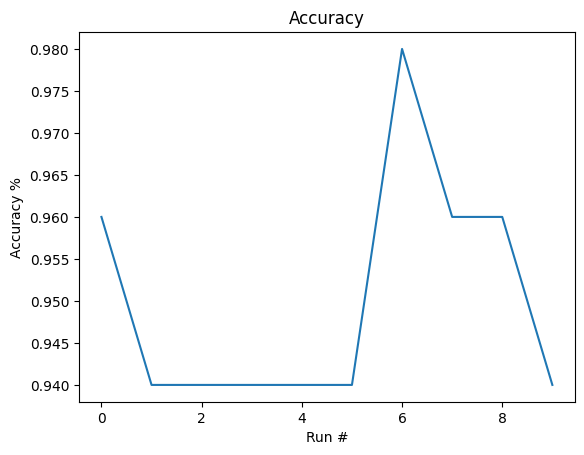

In [583]:
def accuracy(repeats=1):

    accuracy_list = []

    for i in range(repeats):
        # shuffle the rows of the data
        # source: https://www.geeksforgeeks.org/how-to-randomly-select-rows-of-an-array-in-python-with-numpy/
        np.random.shuffle(pichu_data)
        np.random.shuffle(pikachu_data)

        # new training data set (50 points from each class)
        pichu_data_random = pichu_data[:50]
        pikachu_data_random = pikachu_data[:50]

        # new test data from the remaining data
        test_data_pichu = pichu_data[50:]
        test_data_pikachu = pikachu_data[50:]

        # classify the points with count=1 flag: returned value is number of pichu classifications
        # tp = pichu classifications of pichu data
        # tn = non pichu classifications of pikachu data
        tp = classification(test_data_pichu, pichu_points=pichu_data_random, \
            pikachu_points=pikachu_data_random, count=1)
        tn = len(test_data_pikachu) - classification(test_data_pikachu, pichu_points=pichu_data_random, \
            pikachu_points=pikachu_data_random, count=1)

        # calculate accuracy and append to list to allow calculation of accuracy mean and accuracy plot
        total = len(test_data_pichu) + len(test_data_pikachu)
        accuracy = (tp+tn)/total
        accuracy_list.append(accuracy)

    # return mean accuracy through np array
    # source: https://stackoverflow.com/a/20329778
    accuracy = np.array(accuracy_list)
    print(f"The mean accuracy is {np.mean(accuracy):.3f}%")

    # only plot the accuracy if it has been run more than once
    if repeats > 1:
        plt.plot(accuracy)
        plt.title("Accuracy")
        plt.xlabel("Run #")
        plt.ylabel("Accuracy %")

accuracy()
accuracy(repeats=10)